# Imports and Packages

In [18]:
import matplotlib.pyplot as plt 
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm

from sympy import symbols, diff

%matplotlib inline

# A simple cost function
#### $f(x) = x^2 + x + 1$

In [19]:
def f(x) : 
    return x**2 + x + 1

In [20]:
# make data
x_1 = np.linspace(start=-3,stop=3,num=500)

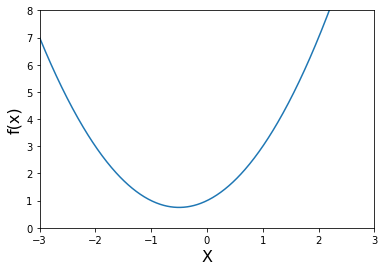

In [21]:
# plot
plt.xlim(-3,3)
plt.ylim(0,8)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1,f(x_1))
plt.show()

### Slope & Derivatives

In [22]:
def df(x):
    return 2*x + 1

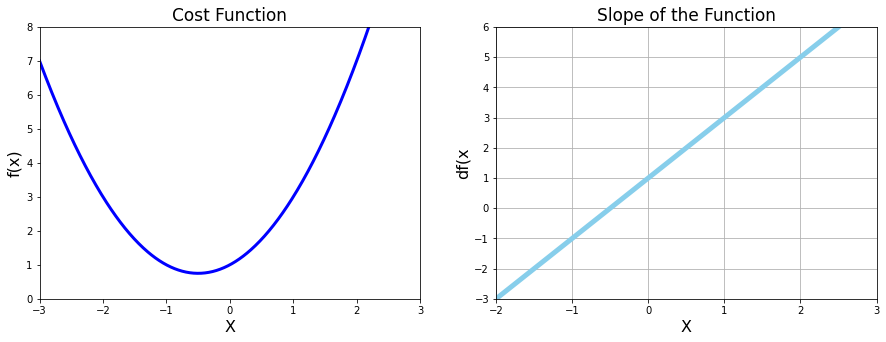

In [23]:
#plot func. and derivative side by side

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Cost Function', fontsize=17)
plt.xlim(-3,3)
plt.ylim(0,8)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1,f(x_1), color='blue', linewidth=3)

plt.subplot(1,2,2)
plt.title('Slope of the Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x', fontsize=16)
plt.grid()
plt.xlim(-2,3)
plt.ylim(-3,6)

plt.plot(x_1,df(x_1), color='skyblue', linewidth=5)

plt.show()

## Gradient Descent

In [24]:
new_x = 3
prev_x = 0
step_multiplier = 0.1
precision = 0.00001
x_list=[new_x]
slope_list=[df(new_x)]
for n in range(500):
    prev_x = new_x
    grad = df(prev_x)
    new_x = prev_x - step_multiplier * grad
    step_size = abs(new_x-prev_x)
    
    # print(step_size)
    
    x_list.append(new_x)
    slope_list.append(df(new_x))
    if step_size < precision:
        print('Count : ',n)
        break
print('Local min occurs at : ', new_x)
print('Slope of df(x) value at this point is : ', df(new_x))
print('f(x) value or cost at this point is : ', f(new_x))


Count :  50
Local min occurs at :  -0.49996003706460423
Slope of df(x) value at this point is :  7.992587079153068e-05
f(x) value or cost at this point is :  0.7500000015970362


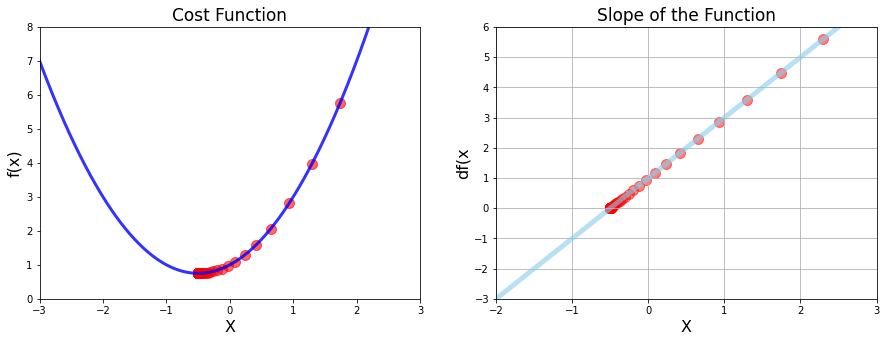

In [25]:
#superimpose the gradient descent calculations

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Cost Function', fontsize=17)
plt.xlim(-3,3)
plt.ylim(0,8)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1,f(x_1), color='blue', linewidth=3, alpha=0.8)

values = np.array(x_list)
plt.scatter(x_list, f(values), color='r', s=100, alpha=0.6)

plt.subplot(1,2,2)
plt.title('Slope of the Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x', fontsize=16)
plt.grid()
plt.xlim(-2,3)
plt.ylim(-3,6)

plt.plot(x_1,df(x_1), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(x_list, slope_list, color='r', s=100, alpha=0.5)


plt.show()

### example 2 - Multiple minima vs initial guess & adv. functions

#### $g(x) = x^4 - 4x^2 + 5$

In [26]:
#make some data
x_2=np.linspace(-2,2,1000)

def g(x):
    return x**4 - 4*x**2 + 5

def dg(x):
    return 4*x**3 - 8*x

## Gradient Descent as a Py Func.

In [27]:
def grad_desc(deri_func, init_guess, multiplier=0.02, prec=0.001, max_iter=300):
    new_x = init_guess
    x_list=[new_x]
    slope_list=[deri_func(new_x)]

    for n in range(max_iter):
        prev_x = new_x
        grad = deri_func(prev_x)
        new_x = prev_x - multiplier * grad

        step_size = abs(new_x-prev_x)        
        x_list.append(new_x)
        slope_list.append(deri_func(new_x))
        if step_size < prec:
            break

    return new_x, x_list, slope_list

In [28]:
local_min, list_x, deri_list = grad_desc(dg, 0.5,0.01,0.0001)

print('Local min occurs at : ', local_min)
print('Number of steps : ', len(list_x))

Local min occurs at :  1.4137636556157256
Number of steps :  56


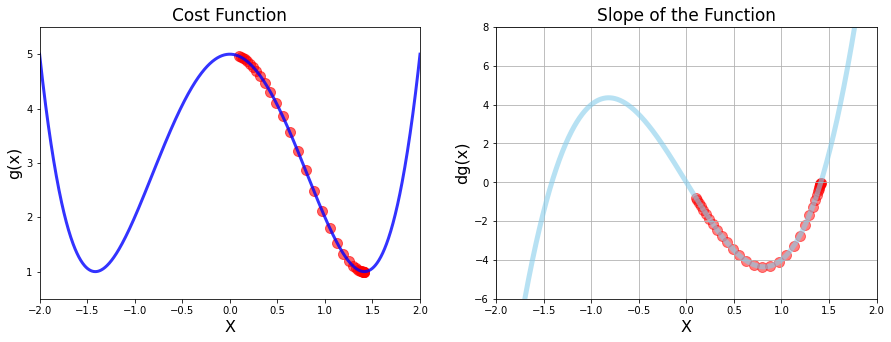

In [29]:
#plot func. and derivative side by side

local_min, list_x, deri_list = grad_desc(dg, 0.1)
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Cost Function', fontsize=17)
plt.xlim(-2,2)
plt.ylim(0.5,5.5)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2,g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='r', s=100, alpha=0.6)

plt.subplot(1,2,2)
plt.title('Slope of the Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2,2)
plt.ylim(-6,8)

plt.plot(x_2,dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x,deri_list, color='r',s=100, alpha=0.5)

plt.show()

# Divergence, overflow
### $h(x) = x^5 - 2x^4 + 2$

In [30]:
#make data

x_3 = np.linspace(start=-2.5, stop=2.5, num=100)

def h(x):
    return x**5 - 2*x**4 + 2

def dh(x):
    return 5*x**4 - 8*x**3

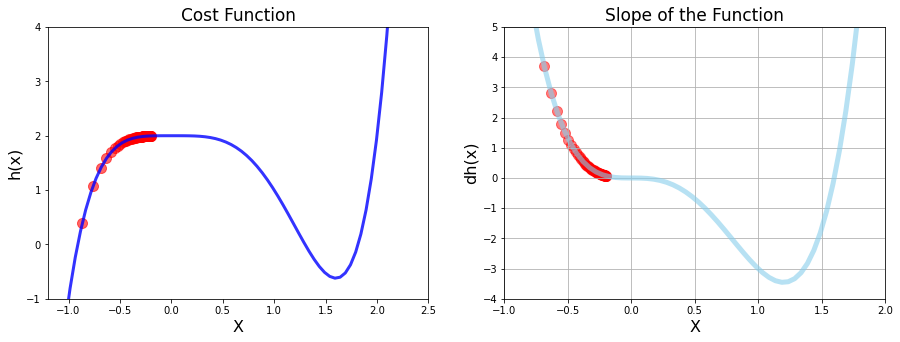

local min :  -2071072.4470816324
cost :  -3.810455326061589e+31
steps :  71


In [31]:
#plot func. and derivative side by side

local_min, list_x, deri_list = grad_desc(dh, -0.2, max_iter=70)
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Cost Function', fontsize=17)
plt.xlim(-1.2,2.5)
plt.ylim(-1,4)
plt.xlabel('X', fontsize=16)
plt.ylabel('h(x)', fontsize=16)

plt.plot(x_3,h(x_3), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, h(np.array(list_x)), color='r', s=100, alpha=0.6)

plt.subplot(1,2,2)
plt.title('Slope of the Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dh(x)', fontsize=16)
plt.grid()
plt.xlim(-1,2)
plt.ylim(-4,5)

plt.plot(x_3,dh(x_3), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x,deri_list, color='r',s=100, alpha=0.5)

plt.show()
print("local min : ", local_min)
print("cost : ", h(local_min))
print("steps : ",len(list_x)) 

In [32]:
import sys 
sys.float_info.max

1.7976931348623157e+308

# The Learning Rate

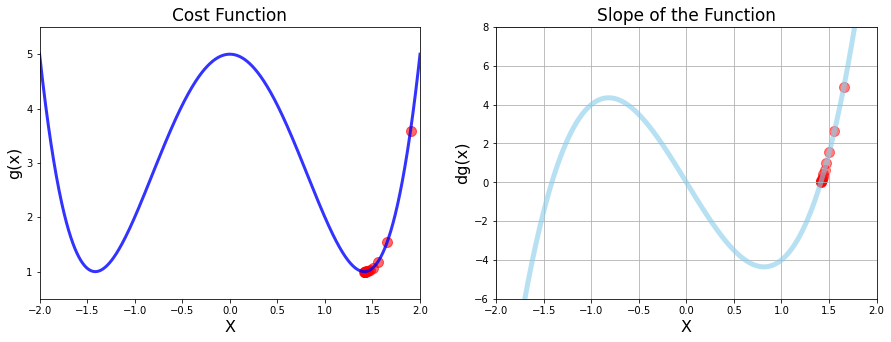

steps :  14


In [33]:
#plot func. and derivative side by side

local_min, list_x, deri_list = grad_desc(dg, 1.9,multiplier=0.02, max_iter=500)
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Cost Function', fontsize=17)
plt.xlim(-2,2)
plt.ylim(0.5,5.5)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2,g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='r', s=100, alpha=0.6)

plt.subplot(1,2,2)
plt.title('Slope of the Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2,2)
plt.ylim(-6,8)

plt.plot(x_2,dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x,deri_list, color='r',s=100, alpha=0.5)

plt.show()

print("steps : ", len(list_x))

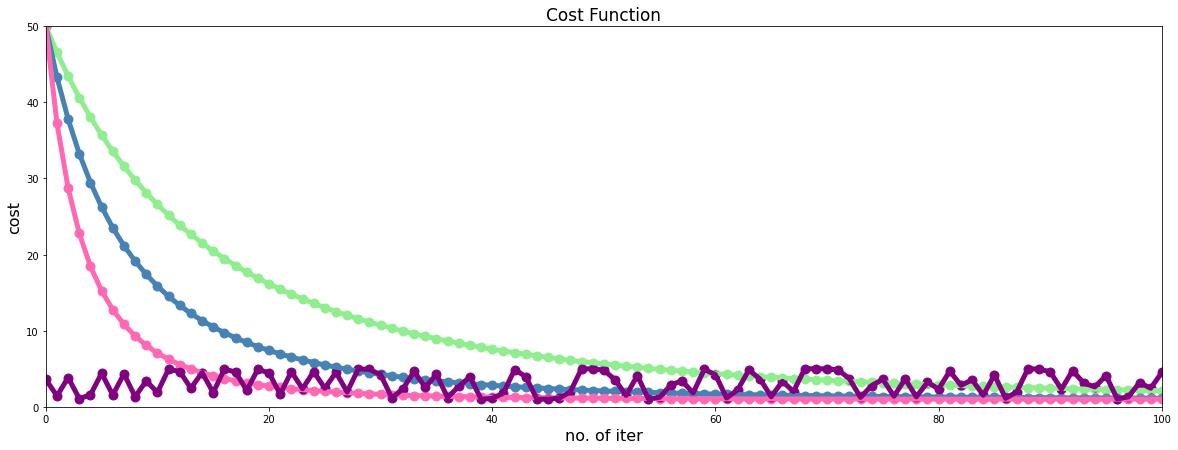

In [34]:
n=100
low_gamma = local_min, list_x, deri_list = grad_desc(dg, init_guess= 3, multiplier=0.0005,prec=0.0001, max_iter=n)

mid_gamma = local_min, list_x, deri_list = grad_desc(dg, init_guess= 3, multiplier=0.001,prec=0.0001, max_iter=n)

high_gamma = local_min, list_x, deri_list = grad_desc(dg, init_guess= 3, multiplier=0.002,prec=0.0001, max_iter=n)

#experiment

insane_gamma = local_min, list_x, deri_list = grad_desc(dg, init_guess= 1.9, multiplier=0.25,prec=0.0001, max_iter=n)

plt.figure(figsize=(20,7))

plt.xlim(0,n)
plt.ylim(0,50)

plt.title('Cost Function', fontsize=17)
plt.xlabel('no. of iter', fontsize=16)
plt.ylabel('cost', fontsize=16)

low_values = np.array(low_gamma[1])
iter_list = list(range(0,n+1))

plt.plot(iter_list,g(low_values), color='lightgreen', linewidth=5)
plt.scatter(iter_list, g(np.array(low_values)), color='lightgreen', s=80)

plt.plot(iter_list,g(np.array(mid_gamma[1])), color='steelblue', linewidth=5)
plt.scatter(iter_list, g(np.array(mid_gamma[1])), color='steelblue', s=80)

plt.plot(iter_list,g(np.array(high_gamma[1])), color='hotpink', linewidth=5)
plt.scatter(iter_list, g(np.array(high_gamma[1])), color='hotpink', s=80)

plt.plot(iter_list,g(np.array(insane_gamma[1])), color='purple', linewidth=5)
plt.scatter(iter_list, g(np.array(insane_gamma[1])), color='purple', s=80)

plt.show()

# Data Viz with 3d Charts
### Minimise $f(x,y) = \frac{1}{3^{-x^2 - y^2} + 1}$

In [35]:
def f(x, y):
    r = 3**(-x**2 - y**2)
    return 1 / (r + 1)

In [36]:
#make x & y

x_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)

x_4, y_4 = np.meshgrid(x_4, y_4)

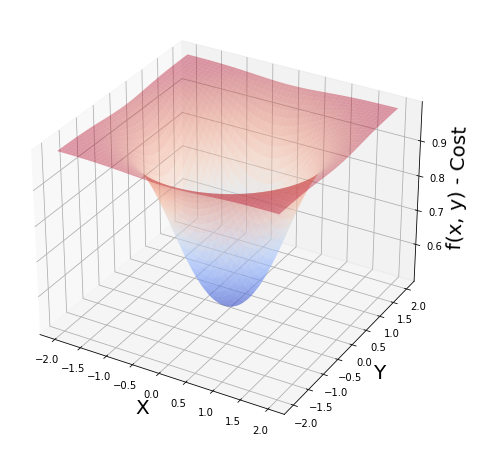

In [38]:
#generating 3d plot

fig = plt.figure(figsize=[12,8])
ax = fig.add_subplot(projection = '3d')
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)
ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha = 0.4)
plt.show()

## Partial derivatives & Symbolic computation

In [ ]:
a, b = symbols('x, y')
print('Cost function f(x, y) : ',f(a, b))
print('Partial derivative wrt to x : ',diff(f(a,b), a))
f(a, b).evalf(subs={a:1.8, b:1.0})

Cost function f(x, y) :  1/(3**(-x**2 - y**2) + 1)
Partial derivative wrt to x :  2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2


0.990604794032582